In [1]:
# Model design
import agentpy as ap
import networkx as nx 
import random 
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample


from fairlearn.datasets import fetch_adult
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, demographic_parity_ratio, equalized_odds_difference, equalized_odds_ratio
from fairlearn.reductions import ExponentiatedGradient

In [2]:
import os

if os.path.isdir("../notebooks"):
    os.chdir("..")

from utils import viz, delta_function, generate_init


from agent import Person

from model import VirusModel, VirusModel_baseline




In [3]:
parameters = {
    'my_parameter':42,
    'agents':100,
    'steps':20,
    'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
    'acc': 0.8, # accuracy of fraud prdediction
    'appeal_wealth': ap.IntRange(0.25,0.3), # minimal wealth needed for appeal (could also become a param for distr. eventually)
    #'wealth_impact'
    'clf': 'hist', # None, 'hist'
    'expi': None
    
}
sample = ap.Sample(parameters, n=1)
model_baseline = VirusModel_baseline(parameters)
exp = ap.Experiment(VirusModel_baseline, sample, iterations =3, record = True)
results_baseline = exp.run() 
df_baseline = results_baseline['variables']['Person']

Scheduled runs: 3
0.5695
63
63
63
63
63
63
63
63
63
63
63


/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda

63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63


/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda

63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63


KeyboardInterrupt: 

In [4]:
df_baseline['misclassifications'] = (df_baseline['fraud_pred'] - df_baseline['fraud'])
# df_baseline[df_baseline['fraud_pred'] ==0]['wealth'].min()

df_baseline = df_baseline[df_baseline.fraud_pred != -1]
# df_baseline[df_baseline['misclassifications'] == 0]
df_baseline.head(100) 

NameError: name 'df_baseline' is not defined

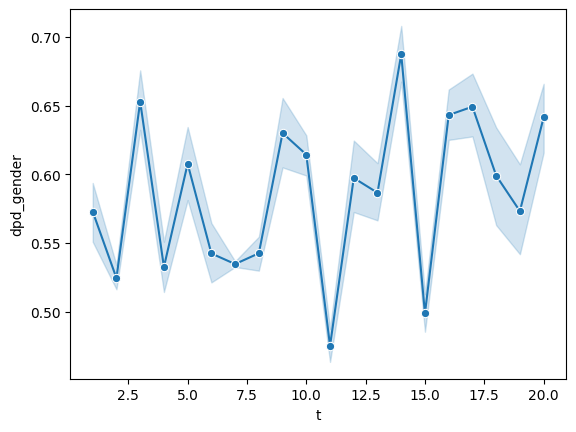

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

sns.lineplot(ax = ax,
                data = df_baseline,
                x =  df_baseline.index.get_level_values('t'),
                y = df_baseline['dpd_gender'],
                marker = 'o')

# plt.ylim(0,0.2)
# plt.xlim(0,50)

plt.show()

In [ ]:
# parameters = {
#     'my_parameter':42,
#     'agents':500,
#     'steps':100,
#     'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
#     'acc': 0.8, # accuracy of fraud prdediction
#     'appeal_wealth': ap.IntRange(0.25,0.3), # minimal wealth needed for appeal (could also become a param for distr. eventually)
#     #'wealth_impact'
#     'clf': 'hist', # None, 'hist'
#     'expi': None
    
# }
# sample = ap.Sample(parameters, n=1)
# model_baseline = VirusModel(parameters)
# exp = ap.Experiment(VirusModel, sample, iterations =2, record = True)
# results_baseline = exp.run() 
# df_baseline = results_baseline['variables']['Person']


In [ ]:
df_baseline['misclassifications'] = (df_baseline['fraud_pred'] - df_baseline['fraud'])
# df_baseline[df_baseline['fraud_pred'] ==0]['wealth'].min()

df_baseline.head() 
df_baseline = df_baseline[df_baseline.fraud_pred != -1]
# df_baseline[df_baseline['misclassifications'] == 0]
df_baseline.head() 

/var/folders/_3/m4zxq5yx589d0965c6l5j1q80000gp/T/ipykernel_89835/1515005289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baseline['misclassifications'] = (df_baseline['fraud_pred'] - df_baseline['fraud'])


wealth   health  fraud_pred  fraud  race  gender  \
iteration obj_id t                                                     
0         1      1     0.0  0.37454           1      1     0       0   
                 2     0.0  0.37454           1      1     0       0   
                 3     0.0  0.37454           1      0     0       0   
                 4     0.0  0.37454           1      0     0       0   
                 5     0.0  0.37454           1      0     0       0   

                    convicted  eod_gender  eod_race  dpd_gender  dpd_race  \
iteration obj_id t                                                          
0         1      1          1    0.336134  0.769231    0.336134  0.769231   
                 2          1    0.439216  0.823529    0.439216  0.823529   
                 3          1    0.481481  0.866667    0.481481  0.866667   
                 4          1    0.353684  0.818182    0.353684  0.818182   
                 5          1    0.388393  0.742105    0.388393  0.742105   

                    misclassifications  
iteration obj_id t                      
0         1      1                   0  
                 2                   0  
                 3                   1  
                 4                   1  
                 5                   1

In [ ]:
y_true = list(df_baseline['fraud'])
y_pred = list(df_baseline['fraud_pred'])

gender = df_baseline['gender']

len(y_true)

print(demographic_parity_ratio( y_true=y_true, y_pred=y_pred, sensitive_features=gender))
equalized_odds_ratio( y_true=y_true, y_pred=y_pred, sensitive_features=gender)




0.6836734693877551


0.6077345566745387

In [ ]:
df_baseline

wealth   health  fraud_pred  fraud  race  gender  \
iteration obj_id t                                                      
0         1      1      0.0  0.37454           1      1     0       0   
                 2      0.0  0.37454           1      1     0       0   
                 3      0.0  0.37454           1      0     0       0   
                 4      0.0  0.37454           1      0     0       0   
                 5      0.0  0.37454           1      0     0       0   
...                     ...      ...         ...    ...   ...     ...   
2         100    16     0.0  0.37454           1      1     0       1   
                 17     0.0  0.37454           1      1     0       1   
                 18     0.0  0.37454           1      1     0       1   
                 19     0.0  0.37454           1      0     0       1   
                 20     0.0  0.37454           1      1     0       1   

                     convicted  eod_gender  eod_race  dpd_gender  dpd_race  \
iteration obj_id t                                                           
0         1      1           1    0.336134  0.769231    0.336134  0.769231   
                 2           1    0.439216  0.823529    0.439216  0.823529   
                 3           1    0.481481  0.866667    0.481481  0.866667   
                 4           1    0.353684  0.818182    0.353684  0.818182   
                 5           1    0.388393  0.742105    0.388393  0.742105   
...                        ...         ...       ...         ...       ...   
2         100    16          1    0.608696  0.666667    0.608696  0.666667   
                 17          1    0.525526  0.720000    0.525526  0.720000   
                 18          1    0.608696  0.640000    0.608696  0.640000   
                 19          1    0.364583  0.593137    0.364583  0.593137   
                 20          1    0.722222  0.512821    0.722222  0.512821   

                     misclassifications  
iteration obj_id t                       
0         1      1                    0  
                 2                    0  
                 3                    1  
                 4                    1  
                 5                    1  
...                                 ...  
2         100    16                   0  
                 17                   0  
                 18                   0  
                 19                   1  
                 20                   0  

[6000 rows x 12 columns]

In [ ]:
from fairlearn.preprocessing import CorrelationRemover

import pandas as pd

from fairlearn.datasets import fetch_diabetes_hospital

X = df_baseline[['race', 'gender', 'wealth', 'health']]

cr = CorrelationRemover(sensitive_feature_ids=['race', 'gender'])

cr.fit(X)
CorrelationRemover(sensitive_feature_ids=['race', 'gender'])

X_transform = cr.transform(X)

s = StandardScaler()

s.fit(X)

StandardScaler()

In [ ]:
# from fairlearn.preprocessing import CorrelationRemover

# import pandas as pd

# from fairlearn.datasets import fetch_diabetes_hospital

# data = fetch_diabetes_hospital()

# X = data.data[["race", "time_in_hospital", "had_inpatient_days", "medicare"]]

# X = pd.get_dummies(X)

# X = X.drop(["race_Asian",

#                     "race_Caucasian",

#                     "race_Hispanic",

#                     "race_Other",

#                     "race_Unknown",

#                     "had_inpatient_days_False",

#                     "medicare_False"], axis=1)

# cr = CorrelationRemover(sensitive_feature_ids=['race_AfricanAmerican'])

# cr.fit(X)
# CorrelationRemover(sensitive_feature_ids=['race_AfricanAmerican'])

# X_transform = cr.transform(X)


             0         1
0    -0.047834  0.342102
1    -0.047834  0.342102
2    -0.047834  0.342102
3    -0.047834  0.342102
4    -0.047834  0.342102
...        ...       ...
5995 -0.295183  0.167282
5996 -0.295183  0.167282
5997 -0.295183  0.167282
5998 -0.295183  0.167282
5999 -0.295183  0.167282

[6000 rows x 2 columns]
             0         1
0    -0.047834  0.342102
1    -0.047834  0.342102
2    -0.047834  0.342102
3    -0.047834  0.342102
4    -0.047834  0.342102
...        ...       ...
5995 -0.295183  0.167282
5996 -0.295183  0.167282
5997 -0.295183  0.167282
5998 -0.295183  0.167282
5999 -0.295183  0.167282

[6000 rows x 2 columns]


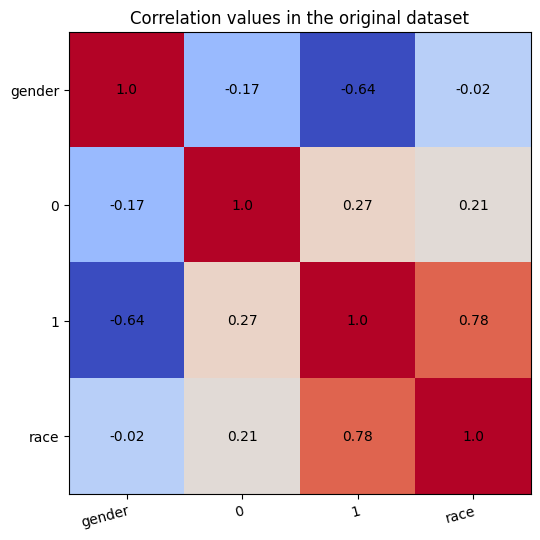

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

from fairlearn.datasets import fetch_diabetes_hospital
from fairlearn.preprocessing import CorrelationRemover


def plot_heatmap(df,y, title):
    df["race"] = list(y)
    # df = df.rename(columns={"had_inpatient_days_True": "had_inpatient_days"})
    cols = list(df.columns)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(round(df.corr(), 2), cmap="coolwarm")

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(cols)), labels=cols)
    ax.set_yticks(np.arange(len(cols)), labels=cols)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=15, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(cols)):
        for j in range(len(cols)):
            ax.text(
                j,
                i,
                round(df.corr().to_numpy()[i, j], 2),
                ha="center",
                va="center",
            )

    ax.set_title(f"{title}")
    plt.show()

X_transform = pd.DataFrame(X_transform)
Xt = copy.deepcopy(X_transform)
print(X_transform)
Xt.insert(0,'gender', list(X['gender']))
print(X_transform)


plot_heatmap(pd.DataFrame(Xt),X['race'], "Correlation values in the original dataset")
# plot_heatmap(X,X['gender'], "Correlation values after CorrelationRemover")
# plot_heatmap(X_cr_alpha, "Correlation values after CorrelationRemover with alpha = 0.5")


In [ ]:
X = df_baseline[['race', 'gender', 'wealth', 'health']]
X.shape
pd.DataFrame(y_true).shape

(6000, 1)

In [ ]:
from fairlearn.reductions import DemographicParity

from fairlearn.metrics import MetricFrame, selection_rate

import numpy as np

import pandas as pd

dp = DemographicParity(difference_bound=0.01)

X,y = generate_init(train_clf = True, n = 10000, fraud_det = 0)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
y=y.rename(columns = {0:'y'})
X = X.rename(columns = {0: 'race', 1:'gender', 2:'wealth', 3:'health'})

df = pd.concat([X,y], axis =1)

# # Separate majority and minority classes
df_majority = df[df['y'] ==0]
df_minority = df[df['y'] ==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                replace=False,    
                                n_samples=4000)#Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                replace=True,     
                                n_samples=4000)# Combine minority class with downsampled majority class
df_up_down_sampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

# X = df_baseline[['fraud','wealth', 'gender', 'race']]


y = df_up_down_sampled['y']
X = df_up_down_sampled.drop('y', axis = 1)
X = X.rename(columns = {0: 'race', 1:'gender', 2:'wealth', 3:'health'})

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

expgrad =  ExponentiatedGradient(GradientBoostingClassifier(), constraints=DemographicParity(),eps=0.1)

expgrad.fit(X_train, pd.DataFrame(y_train), sensitive_features= X_train['race'])






/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/scipy/optimize/_linprog_highs.py:91: RuntimeWarning: invalid value encountered in multiply
  x[infs] = np.sign(x[infs])*CONST_INF
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/scipy/optimize/_linprog_highs.py:91: RuntimeWarning: invalid value encountered in multiply
  x[infs] = np.sign(x[infs])*CONST_INF
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/scipy/optimize/_linprog_highs.py:325: RuntimeWarning: invalid value encountered in multiply
  lhs_ub = -np.ones_like(b_ub)*np.inf  # LHS of UB constraints is -inf
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/scipy/optimize/_linprog_highs.py:91: RuntimeWarning: invalid value encountered in multiply
  x[infs] = np.sign(x[infs])*CONST_INF
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/scipy/optimize/_linprog_highs.py:325: RuntimeWarning: invalid value encountered in multiply
  lhs_ub = -np.ones_like(b_ub)*np.inf  # LHS of UB constrain

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x1626bf9d0>,
                      eps=0.1, estimator=GradientBoostingClassifier(),
                      nu=0.003083778758285548)

In [ ]:
y_pred = (expgrad.predict(X_test))

abs(y_pred - np.array(y_test).flatten()).sum()/len(y_pred)



0.393

Now just run it through the fairness metrics, not much better than without?? 

-> implement everything in clf_train

In [ ]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
# y_true = list(df_baseline['fraud'])
# y_pred = list(df_baseline['fraud_pred'])

gender = X_test['gender']

print(gender.shape)
print(np.array(y_true).shape)


print(demographic_parity_ratio( y_true=y_test, y_pred=y_pred, sensitive_features=gender))
equalized_odds_ratio( y_true=y_test, y_pred=y_pred, sensitive_features=gender)




(2000,)
(6000,)
0.7178559472094158


0.6951691741255633